<a href="https://colab.research.google.com/github/RifatMuhtasim/NLP_Natural_Language_Processing/blob/main/Learn/23.Gensim_Word_Vector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# News Classification (Gensim "word2vec-google-news-300")

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
import spacy

#Gensim
import gensim.downloader as api

In [4]:
#load pretrained google news model using gensim
wv = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [6]:
#download & load spacy english large model
# !python -m spacy download en_core_web_lg

nlp = spacy.load("en_core_web_lg")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 714.6 kB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Text Extraction & Cleanup

In [7]:
#load dataset
df = pd.read_csv("https://raw.githubusercontent.com/codebasics/nlp-tutorials/main/14_word_vectors_spacy_text_classification/Fake_Real_Data.csv")
print("Shape of dataset: ", df.shape)
df.head()

Shape of dataset:  (9900, 2)


,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [8]:
#display numbers of labels on this dataset
df['label'].value_counts()

label
Fake    5000
Real    4900
Name: count, dtype: int64

In [9]:
#create a new column for target 'fake' variable
df['fake'] = df['label'].apply(lambda x: 1 if x=='Fake' else 0)
df.head()

,Text,label,fake
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,1
1,U.S. conservative leader optimistic of common ...,Real,0
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,0
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,1
4,Democrats say Trump agrees to work on immigrat...,Real,0


## Preprocessing

In [10]:
#remove stop word, punctuations, convert word to base word and vectorization the sentence
def Preprocessing_and_vectorization(text):
    doc = nlp(text)

    filtered_tokens = []
    for token in doc:
        if not token.is_stop and not token.is_punct:
            filtered_tokens.append(token.lemma_)

    #return vectorized
    return wv.get_mean_vector(filtered_tokens)

In [11]:
df['vector'] = df['Text'].apply(Preprocessing_and_vectorization)
df.head()

,Text,label,fake,vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,1,"[0.008657642, 0.019024342, -0.011917442, 0.032..."
1,U.S. conservative leader optimistic of common ...,Real,0,"[0.010864096, 0.007960429, 0.0011915653, 0.014..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,0,"[0.018134918, 0.0062743523, -0.005872244, 0.03..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,1,"[0.01255197, 0.012613623, 5.9780963e-05, 0.021..."
4,Democrats say Trump agrees to work on immigrat...,Real,0,"[-0.0019059887, 0.011889367, 0.0035395357, 0.0..."


## Feature Engineering

In [12]:
#train test split
X = df['vector']
y = df['fake']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [13]:
#convert 2D numpy array
X_train_2d = np.stack(X_train.values)
X_test_2d = np.stack(X_test.values)

In [20]:
#MinMax Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_2d_scaled = scaler.fit_transform(X_train_2d)
X_test_2d_scaled = scaler.transform(X_test_2d)

## Model Building

In [21]:
#MultinomialNB Model
nb_model = MultinomialNB()
nb_model.fit(X_train_2d_scaled , y_train)

#predition
y_pred = nb_model.predict(X_test_2d)

#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       980
           1       0.92      0.95      0.94      1000

    accuracy                           0.93      1980
   macro avg       0.94      0.93      0.93      1980
weighted avg       0.94      0.93      0.93      1980



In [22]:
#XGBoost Model
xgb_model = XGBClassifier()
xgb_model.fit(X_train_2d, y_train)

#prediciton
y_pred = xgb_model.predict(X_test_2d)

#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.98      0.99      1000

    accuracy                           0.99      1980
   macro avg       0.99      0.99      0.99      1980
weighted avg       0.99      0.99      0.99      1980



## Evaluation

[]

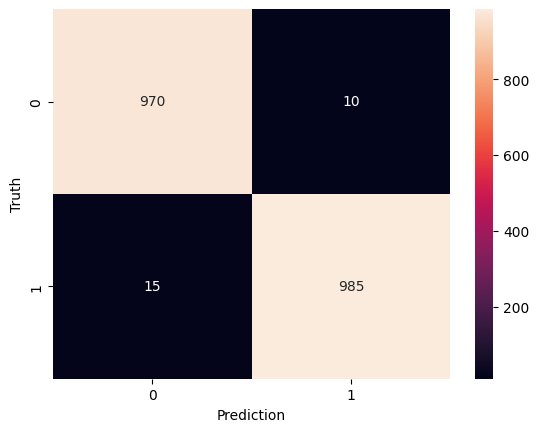

In [24]:
#plot confusion matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Prediction")
plt.ylabel("Truth")
plt.plot()